# Data cleansing notes on removed records:

## See data_engineering.ipynb for more details.

### Measurement Records Information
    19,550 total records before changes
    1,447 records with blank precipitation (col = "prcp")
    18,103 records with no known issues after removing 1,447 with blank prcp
    Percentage of records removed is 0.07%
    Percentage of records remaining is 93.0%


In [2]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))
import datetime as dt
from datetime import datetime, date, time

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_

In [3]:
# Create an engine for the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Use the Inspector to explore the database
inspector = inspect(engine)
inspector.get_table_names()

['station', 'weather']

In [5]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('weather')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
# Reflect hawaii database table station into its ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [8]:
# Reflect hawaii database table weather into it's ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
weather = Base.classes.weather

In [9]:
# Start a session to query the database
session = Session(engine)

# Queries for Temperature Analysis 2014-01-15 to 2014-01-28
                            * Using station USC00519281
                            * all stations 

## My Vacation Period 2015-01-15 to 2015-01-28

In [10]:
# Return all the tobs for weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs = session.query(weather.station, weather.date, weather.tobs).\
                     filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                                 weather.station == 'USC00519281')).all()
tobs

[('USC00519281', '2014-01-15', 62.0),
 ('USC00519281', '2014-01-16', 68.0),
 ('USC00519281', '2014-01-17', 66.0),
 ('USC00519281', '2014-01-18', 66.0),
 ('USC00519281', '2014-01-19', 67.0),
 ('USC00519281', '2014-01-20', 65.0),
 ('USC00519281', '2014-01-21', 71.0),
 ('USC00519281', '2014-01-22', 68.0),
 ('USC00519281', '2014-01-23', 58.0),
 ('USC00519281', '2014-01-24', 58.0),
 ('USC00519281', '2014-01-25', 73.0),
 ('USC00519281', '2014-01-26', 75.0),
 ('USC00519281', '2014-01-27', 66.0),
 ('USC00519281', '2014-01-28', 66.0)]

In [11]:
# Return count of the tobs for weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs = session.query(func.count(weather.tobs)).\
                     filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                                 weather.station == 'USC00519281')).scalar()
tobs

14

In [12]:
# Minimum tobs for weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs_min = session.query(weather.station, func.min(weather.tobs)).\
           filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                       weather.station == 'USC00519281')).all()
tobs_min

[('USC00519281', 58.0)]

In [13]:
# Maximum tobs using weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs_max = session.query(weather.station, func.max(weather.tobs)).\
           filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                       weather.station == 'USC00519281')).all()
tobs_max

[('USC00519281', 75.0)]

In [14]:
# Average tobs using weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs_avg = session.query(weather.station, func.avg(weather.tobs)).\
           filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                       weather.station == 'USC00519281')).all()
tobs_avg

[('USC00519281', 66.35714285714286)]

In [15]:
# Min, Avg, Max  tobs using weather station USC00519281 - period 2014-01-15 - 2014-01-28
tobs_mam = session.query(weather.station, func.min(weather.tobs),func.avg(weather.tobs),\
                         func.max(weather.tobs),(func.max(weather.tobs) - func.min(weather.tobs))).\
           filter(and_(weather.date.between('2014-01-15','2014-01-28'),\
                       weather.station == 'USC00519281')).all()
tobs_mam

[('USC00519281', 58.0, 66.35714285714286, 75.0, 17.0)]

In [16]:
# Return count of all the tobs for all stations - period 2014-01-15 - 2014-01-28
tobs = session.query(func.count(weather.tobs)).\
                     filter(weather.date.between('2014-01-15','2014-01-28')).scalar()
tobs

89

In [17]:
# Min, Avg, Max tobs using all weather stations - period 2014-01-15 - 2014-01-28
tobs_mam = session.query(func.min(weather.tobs),func.avg(weather.tobs),\
                         func.max(weather.tobs),\
                         (func.max(weather.tobs) - func.min(weather.tobs))).\
           filter(weather.date.between('2014-01-15','2014-01-28')).all()
tobs_mam

[(57.0, 67.87640449438203, 76.0, 19.0)]

In [18]:
# put data into a data frame for charting
tobs_mam_df = pd.DataFrame(tobs_mam,columns=["min_tobs", "avg_tobs", "max_tobs","yerr"]) 
print(len(tobs_mam_df.index))
tobs_mam_df.info()
tobs_mam_df

1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
min_tobs    1 non-null float64
avg_tobs    1 non-null float64
max_tobs    1 non-null float64
yerr        1 non-null float64
dtypes: float64(4)
memory usage: 112.0 bytes


,min_tobs,avg_tobs,max_tobs,yerr
0,57.0,67.876404,76.0,19.0


In [19]:
def calc_temps(start_date, end_date):
    tobs_mam = session.query(func.min(weather.tobs),func.avg(weather.tobs),\
                         func.max(weather.tobs),\
                         (func.max(weather.tobs) - func.min(weather.tobs))).\
           filter(weather.date.between(start_date, end_date)).all()
    return tobs_mam
    
print(calc_temps('2014-01-15','2014-01-28'))

[(57.0, 67.87640449438203, 76.0, 19.0)]


In [20]:
# put data into a data frame for charting
tobs_mam_df = pd.DataFrame(calc_temps('2014-01-15','2014-01-28'),\
                           columns=["min_tobs", "avg_tobs", "max_tobs","yerr"]) 
print(len(tobs_mam_df.index))
tobs_mam_df.info()
tobs_mam_df

1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
min_tobs    1 non-null float64
avg_tobs    1 non-null float64
max_tobs    1 non-null float64
yerr        1 non-null float64
dtypes: float64(4)
memory usage: 112.0 bytes


,min_tobs,avg_tobs,max_tobs,yerr
0,57.0,67.876404,76.0,19.0


<IPython.core.display.Javascript object>


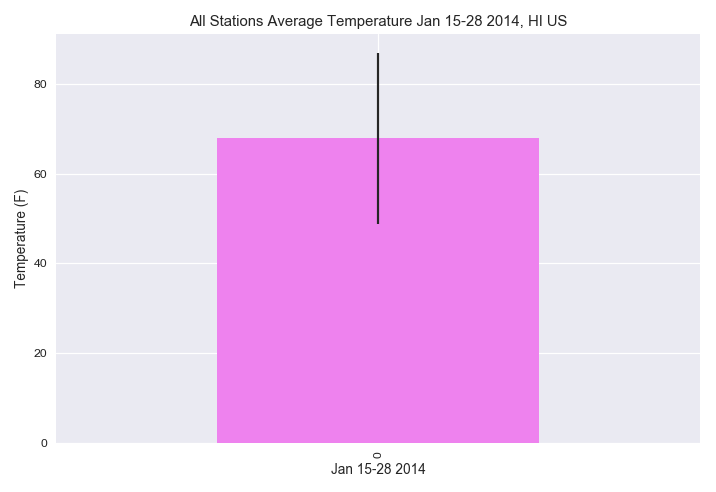

In [22]:
# Pandas DataFrame.plot(kind='bar')
yerr = tobs_mam_df["yerr"]
ax = tobs_mam_df["avg_tobs"].plot(kind='bar',color='violet', width= .5, use_index=False, 
                 yerr=yerr, title="All Stations Average Temperature Jan 15-28 2014, HI US")
ax.set_xlabel("Jan 15-28 2014")
ax.set_ylabel("Temperature (F)")

plt.tight_layout()
plt.savefig("min_avg_max_jan_15-28-2014.png")
plt.show()